# CM3005 Data Science Mid-Term Submission

## Domain-specific area and objectives of the project

The domain-specific area for this project is the automotive industry in Singapore, specifically focusing on predicting car prices. The integration of a linear regression model in this context aims to provide valuable insights to both the buyers and the sellers in the pre-owned car market. The objective of this project is to develop a model that can accurately predict car prices based on its features to assist sellers in setting their prices and also for buyers to make informed decisions before purchasing a used car.

There are multiple factors which would influence car prices such as mileage, year of manufacture, engine cap etc. These factors create a complex pricing landscape, making it an ideal candidate for a linear regression model. By understanding the relationships between these factors, the model would be able to provide a reliable estimate of the price of a used car.

### Objectives of the project:

1. Data collection: 
Implement web scraping techniques to collect the most up-to-date features and prices of used cars in Singapore.

2. Data Preprocessing:
Clean and preprocess the scrapped data, addressing issues such as missing values, outliers and inconsistencies. Normalise numerical features and encode categorical variables to prepare the dataset for model training.

3. Feature Selection: 
Select the most influential features affecting the price. Select variables such as mileage, engine capacity, year of manufacture and other additional features.

4. Linear Regression Model Training:
Implement a linear regression model using the preprocessed data to study the relationship between the features and the price.

5. Model Evaluation:
Access the performance of the linear regression model using appropriate metrics such as Mean Squared Error or R-squared. Make some adjustments to enhance its accuracy.

6. Impact and Contribution to the Automotive Industry in Singapore:
The successful implementation of the linear regression model would benefit both the buyers and the sellers in the used car market in Singapore. Buyers would be able to make informed decisions before purchasing and the sellers would be able to offer competitive prices which would attract the buyers.

### Conclusion:

In summary, this project addresses the challenges in predicting car prices in Singapore through the use of machine learning. The results are expected to have a huge contribution to enhancing fairness, transparency and efficiency in the market, benefiting both the buyers and the sellers.

## Dataset Description

The selected dataset for the project is sourced from the most popular car sales platform in Singapore, providing a comprehensive collection of used car listings. The dataset is designed to facilitate the development of the linear regression model to predict car prices based on various features. The primary objective is to create a versatile and representative dataset that captures the diversity of the used car market.

### Size and Scope:

The dataset encompasses a substantial amount of car listings, ensuring a broad representation of the different features of a car. The dataset offers sufficient diversity to capture the nuances of the automotive industry in Singapore. The inclusion of various specifications of a car enhances the dataset's richness. 

### Data Types:

The dataset includes a mix of data types, such as numerical and categorical variables. Numerical data includes features such as mileage, engine capacity, depreciation, and registration date, while categorical data includes details such as the title of the listing and vehicle type. This diversity enables the construction of a comprehensive linear regression model that considers multiple factors influencing car prices.

### Acquisition Method:

The data was acquired through the use of web scrapping. The scrapping process involved extracting relevant information from each listing. The data collection process adhered to ethical guidelines, respecting the terms of service of the website and ensuring minimal disruption to its normal functioning.

### Source of the Dataset:

The dataset originates from Sgcarmart (https://www.sgcarmart.com/), a well-known online marketplace for buying cars and selling used cars in Singapore. The dataset adheres to the terms of use specified by the platform, and all efforts have been made to ensure the responsible and ethical use of the data.

### Conclusion:

In summary, the dataset is a robust representation of the automotive industry in Singapore, sourced from a reputable online platform. With its diverse entries and inclusion of various features, the dataset is well suited for developing and training a linear regression model to predict car prices accurately. The comprehensive nature of the dataset aligns with the objectives of the coursework, providing a solid foundation for analysis and machine learning model development.

### Data Extraction from Sgcarmart

Beautiful soup is used for parsing the web page to extract specific piece of information. The requests library of python is used to send requests to the html page to get the content of the page.

In [1]:
# Importing necessary libraries for scraping and converting the collected data
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
# Creating the lists of website urls which would be used for scraping
websiteLists = []

i = 0

while i < 90:
    websiteLists.append("https://www.sgcarmart.com/used_cars/listing.php?BRSR=" + str(i*100) + "&RPG=100&AVL=2&VEH=0")
    i+=1

In [3]:
# Initialise the lists as an empty array
titleList = []
priceList = []
depreciationList = []
registrationDateList = []
engineCapList = []
mileageList = []
vehicleTypeList = []
regDateVehType = []

# Creating a loop whereby each page would be scrape for its information about the listing
for website in range(len(websiteLists)):
    webpage = requests.get(websiteLists[website])
    soup = BeautifulSoup(webpage.text, "html.parser")

    # The following function scrapes the title
    for title in soup.find_all('div',{'style':'width:186px;padding-left:4px;'}):
        titleList.append(title.text.strip())

    # The following function scrapes the price
    for price in soup.find_all('div',{'style':'width:67px; font-weight: 500;'}):
        priceList.append(price.text.strip())

    # The following function scrapes the depreciation
    for depreciation in soup.find_all('div',{'style':'width:101px;'}):
        depreciationList.append(depreciation.text.strip())

    # The following function scrapes the engine capacity
    for enginecap in soup.find_all('div',{'style':'width:84px;'}):
        engineCapList.append(enginecap.text.strip())

    # The following function scrapes the mileage
    for mileage in soup.find_all('div',{'style':'width:83px;'}):
        mileageList.append(mileage.text.strip())

    # The following function scrapes the registration date and the vehicle type as they contain
    # the same style code used for scrapping
    for regdateandvehtype in soup.find_all('div',{'style':'width:89px;'}):
        regDateVehType.append(regdateandvehtype.text.strip())

In [4]:
# After scrapping the registration date and the vehicle type the registration date would always
# be on the even number of the array and the vehicle type would be on the odd number

# This while loop separates the 2 values and inserts the values into its own separate list
j = 1
while j <= len(regDateVehType):
    registrationDateList.append(regDateVehType[j-1])
    vehicleTypeList.append(regDateVehType[j])
    j+=2

In [5]:
# Converting the arrays to a numpy array which would be used in the dataframe
title = np.asarray(titleList)
price = np.asarray(priceList)
depreciation = np.asarray(depreciationList)
regdate = np.asarray(registrationDateList)
enginecap = np.asarray(engineCapList)
mileage = np.asarray(mileageList)
vehtype = np.asarray(vehicleTypeList)

# This function creates the dataframe using the numpy arrays
df = pd.DataFrame({"Title" : title, "Price" : price, "Depreciation/Yr" : depreciation, "Registration Date" : regdate, "Engine Capacity" : enginecap, "Mileage/Km" : mileage, "Vehicle Type" : vehtype})

# This function creates the csv file which is used to store the dataframe
df.to_csv("original_sgcarmart.csv", index=False)

In [6]:
# This function reads from the csv file that was recently created
df = pd.read_csv('original_sgcarmart.csv')

In [7]:
df.head()

,Title,Price,Depreciation/Yr,Registration Date,Engine Capacity,Mileage/Km,Vehicle Type
0,Mercedes-Benz B-Class B180,"$22,800","$16,780 /yr",31-Oct-2014,"1,595 cc","92,000 km",Hatchback
1,Nissan NV350 Microbus 2.5M,"$15,800",N.A,25-Nov-2014,"2,488 cc",-,Bus
2,Mitsubishi Fuso Canter FEB21,"$67,800","$78,070 /yr",06-Nov-2014,"2,998 cc",-,Truck
3,Toyota Hiace 2.8A DX,"$81,800","$14,800 /yr",04-Jul-2019,"2,754 cc","83,000 km",Van
4,Isuzu NHR87A,"$74,800","$12,660 /yr",19-Nov-2019,"1,898 cc","80,000 km",Truck


From the brief view on the data scrapped there are multiple steps that needed to be done to preprocess the data.
1. The rows with empty values have to be dropped.
2. The values within the price, depreciation, engine capacity, mileage columns have to be converted into an integer.

In [8]:
# Creating a separate dataframe to ensure that there are no expected behavious within the dataframe 
df_clean = pd.DataFrame()

# Filtering out any '-' and 'N.A' values and pushing it to the newly created dataframe
df_clean = df[~df.isin(['-', 'N.A']).any(axis=1)].copy()

# Converting the Price column's values to int by removing the $ sign and changing the type to int
df_clean.loc[:, "Price"] = df_clean["Price"].str.replace('[\$\,]', '', regex=True).astype(int)

# Converting the Depreciation column by removing the '$' and '/yr' and changing the type to int
df_clean.loc[:, "Depreciation/Yr"] = df_clean["Depreciation/Yr"].str.replace('[\$\,\ /yr]','',regex=True).astype(int)

# Converting the Engine Capacity column by removing the ',' and 'cc' and changing the type to int
df_clean["Engine Capacity"] = df_clean["Engine Capacity"].str.replace('[\,\ cc]', '', regex=True).astype(int)

# Converting the Mileage column by removing the ',' and 'km' and changing the type to int
df_clean.loc[:, "Mileage/Km"] = df_clean["Mileage/Km"].str.replace('[\,\ km]','',regex=True).astype(int)

In [9]:
# Checking the results of the functions
df_clean.head()

,Title,Price,Depreciation/Yr,Registration Date,Engine Capacity,Mileage/Km,Vehicle Type
0,Mercedes-Benz B-Class B180,22800,16780,31-Oct-2014,1595,92000,Hatchback
3,Toyota Hiace 2.8A DX,81800,14800,04-Jul-2019,2754,83000,Van
4,Isuzu NHR87A,74800,12660,19-Nov-2019,1898,80000,Truck
6,Hyundai Avante 1.6A S,95800,13080,23-Sep-2020,1591,71000,Sedan
9,Lexus ES250 Luxury Sunroof,154800,22450,25-Jul-2019,2487,93000,Luxury


In [10]:
# Checking for any na values
df_clean.isna().sum()

Title                0
Price                0
Depreciation/Yr      0
Registration Date    0
Engine Capacity      0
Mileage/Km           0
Vehicle Type         0
dtype: int64

In [11]:
# Checking the dtypes of each column
print(df_clean.dtypes)

Title                object
Price                 int32
Depreciation/Yr       int32
Registration Date    object
Engine Capacity       int32
Mileage/Km            int32
Vehicle Type         object
dtype: object


In [12]:
# This function creates the csv file which is used to store the cleaned dataframe
df_clean.to_csv("processed_sgcarmart.csv", index=False)

In [13]:
# This function reads from the cleaned csv file that was recently created
df_clean = pd.read_csv('processed_sgcarmart.csv')

## Statistical Analysis

In [14]:
from scipy.stats import describe

# Displaying the basic statistics for numeric columns
numeric_summary = df_clean.describe().round(2)
print(numeric_summary)

            Price  Depreciation/Yr  Engine Capacity  Mileage/Km
count     6889.00          6889.00          6889.00     6889.00
mean    130402.51         21825.09          2006.99    82548.32
std     162935.48         20182.53           864.21    46695.00
min       6800.00          6990.00           647.00        1.00
25%      59800.00         14480.00          1496.00    48664.00
50%      89800.00         17000.00          1797.00    81729.00
75%     139800.00         22170.00          1998.00   112888.00
max    2680000.00        686330.00         12913.00   740000.00


The table shown above provides a brief overview of all the numeric columns within the dataframe.

In [15]:
# Measures of Central Tendency
# The goal is to understand the average and central values of the Price and Depreciation/Yr columns
mean_price = df_clean['Price'].mean()
median_price = df_clean['Price'].median()
median_depreciation = df_clean['Depreciation/Yr'].median()
mode_vehicle_type = df_clean['Vehicle Type'].mode().iloc[0]

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Median Depreciation: {median_depreciation:.2f}")
print(f"Mode Vehicle Type: {mode_vehicle_type}")

Mean Price: 130402.51
Median Price: 89800.00
Median Depreciation: 17000.00
Mode Vehicle Type: SUV


The mean price represents the average values of vehicle prices in the dataset. However, this value could be influenced by extremely high price such as the maximum of $2,680,000. The median price is used to find the middle value of the price column.

The median depreciation reflects the middle value of the Depreciation/Yr column. This is less affected by extreme values compared to the mean and provides a robust indicator of central tendency.

The mode identifies the most frequent occuring Vehicle Type in the dataset.

In [16]:
# Measures of Spread
# The goal is to access the variability and spread of the Engine Capacity and Mileage/km columns
std_engine_capacity = df_clean['Engine Capacity'].std()
iqr_mileage = np.percentile(df_clean['Mileage/Km'], 75) - np.percentile(df_clean['Mileage/Km'], 25)

print(f"Standard Deviation Engine Capacity: {std_engine_capacity:.2f}")
print(f"Interquartile Range Mileage: {iqr_mileage:.2f}")

Standard Deviation Engine Capacity: 864.21
Interquartile Range Mileage: 64224.00


In [17]:
# Distribution Type
# The goal is to determine the distribution type for Price and Depreciation/Yr based on skewness
distribution_type_price = 'Normal' if np.abs(df_clean['Price'].skew()) < 0.5 else 'Skewed'
distribution_type_depreciation = 'Normal' if np.abs(df_clean['Depreciation/Yr'].skew()) < 0.5 else 'Skewed'

print(f"Distribution Type for Price: {distribution_type_price}")
print(f"Distribution Type for Depreciation: {distribution_type_depreciation}")

Distribution Type for Price: Skewed
Distribution Type for Depreciation: Skewed


## Visualisation

In [18]:
# Importing the necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

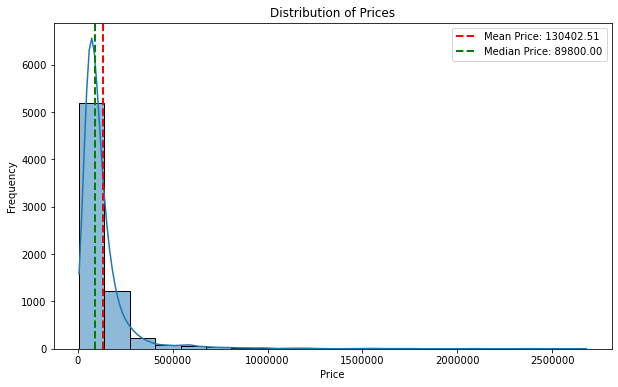

In [19]:
# Visualising the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

mean_price = df_clean['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean Price: {mean_price:.2f}')

median_price = df_clean['Price'].median()
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median Price: {median_price:.2f}')

plt.legend()
plt.show()

The graph above shows that most of the prices are between 0 to 500,000 with only a few outliers from 500,000 to 2,500,00. Most of the vehicles are also priced cheaper than the mean price, which means that the prices are positively skewed, whereby there are a few cars with extremely high prices (outliers) that are pulling the mean higher than the median. In this case, using the median provides a more robust measure of central tendency in this scenario as it is less affected by outliers.

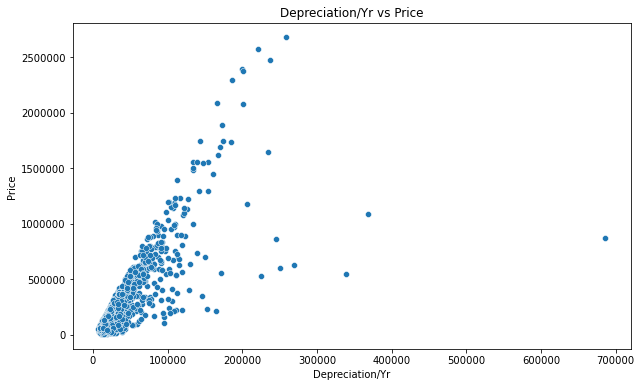

In [20]:
# Visualisation of 'Depreciation/Yr' vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depreciation/Yr', y='Price', data=df_clean)
plt.title('Depreciation/Yr vs Price')
plt.xlabel('Depreciation/Yr')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

This graphs shows a scatterplot when comparing the Depreciation/Yr against the Price.

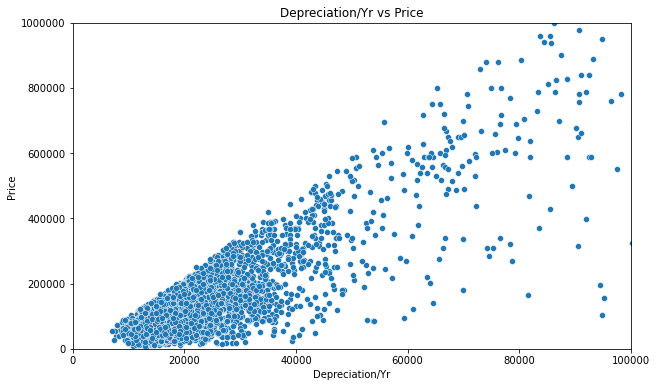

In [21]:
# Visualisation of 'Depreciation/Yr' vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depreciation/Yr', y='Price', data=df_clean)
plt.title('Depreciation/Yr vs Price')
plt.xlabel('Depreciation/Yr')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

plt.xlim(0, 100000)
plt.ylim(0, 1000000)

plt.show()

This is a more indept representation of the Depreciation/Yr compared to Price, whereby the Depreciation/Yr is capped at 100,000 and Price is capped at 1,000,000. This gives a better overview as in the graph above the plots are all scattered within this range. By limiting the range it would provide a better visualisation of the graph by minimising the impact of extreme outliers. From the graph it can be seen that there might be a linear relationship between Depreciation/Yr and Price.

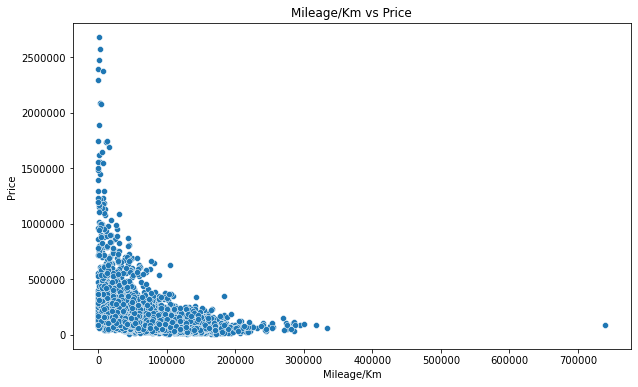

In [22]:
# Visualisation of 'Mileage/Km' vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage/Km', y='Price', data=df_clean)
plt.title('Mileage/Km vs Price')
plt.xlabel('Mileage/Km')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

The graph above shows the Mileage/km compared to Price. The downwards slope at the start may indicate that there is a significant drop in price of vehicles with low mileage. This might suggest that newer vehicles might command higher prices. There might also be a threshold effect whereby once the mileage reaches 100,000 the slope changes and continues horizontally. This might suggest that rate of depreciation slows down after 100,000 km. Since the graph form an L shape, this might suggest that there might not be a linear relationship between the Mileage/Km and Price and a non-linear regression models would be needed to build a predictive model. Therefore, Mileage/Km would not be used to build a linear regression model.

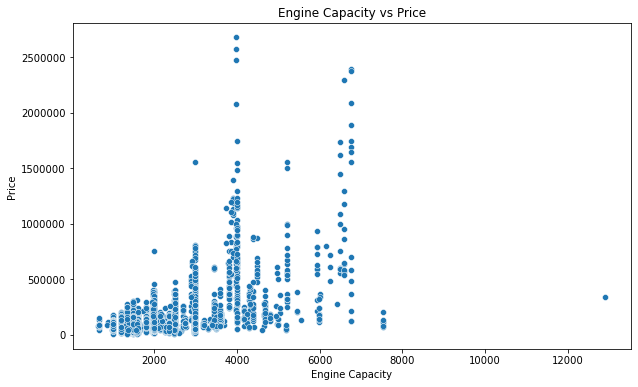

In [23]:
# Visualisation of 'Engine Capacity' vs 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Capacity', y='Price', data=df_clean)
plt.title('Engine Capacity vs Price')
plt.xlabel('Engine Capacity')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

The graph shows the comparision between Engine Capacity and Price. From the graph it could be inferred that Engine Capacity vs Price has many vertical plots which indicates that there might not be enough unique Engine Capacity Values to determine the relationship between the Engine Capacity and Price. Therefore, Engine Capacity would not be used to build a linear regression model.

## Machine Learning

The feature selected is Depreciation/Yr and the label for prediction is Price. Depreciation/Yr is selected as it is likely to have a significant impact on the price of a vehicle. Depreciation is also a crucial factore in the resale value of a vehicle. The model aims to accurately predict the price based on the depreciation. Depreciation/Yr is an important feature as it reflects the rate in which a vehicle loses value per year. This is often the most important feature when purchasing a vehicle. From the graphs above Engine Capacity and Mileage/Km would not be used to build a linear regression model.

In [24]:
# Importing the respective machine learning packages from python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error: 22998258217.42647
Model Score (R-squared): 0.08823732389725036


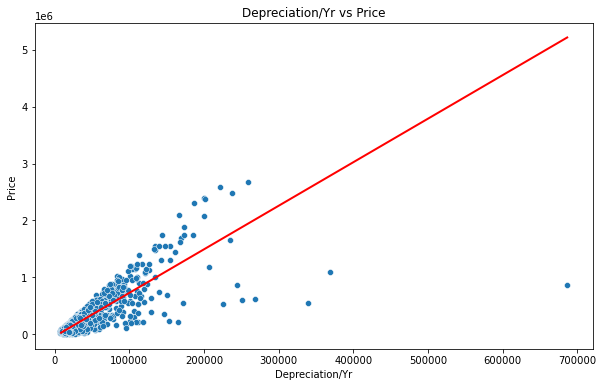

In [25]:
# Selecting the relevant columns
features = df_clean[['Depreciation/Yr']]
label = df_clean['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
model_score = model.score(X_test, y_test)
print(f'Model Score (R-squared): {model_score}')

# Visualising the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depreciation/Yr', y='Price', data=df_clean)

# Resetting indices to prevent errors when plotting
X_test_reset = X_test.reset_index(drop=True)
predictions_reset = pd.Series(predictions, name='Price').reset_index(drop=True)

# Sorting based on 'Depreciation/Yr'
sorted_indices = X_test_reset['Depreciation/Yr'].sort_values().index

# Plotting the regression line
plt.plot(X_test_reset.loc[sorted_indices, 'Depreciation/Yr'], predictions_reset[sorted_indices], color='red', linewidth=2)
plt.title('Depreciation/Yr vs Price')
plt.xlabel('Depreciation/Yr')
plt.ylabel('Price')
plt.show()

Linear regression model was used to predict the prices of vehicles based on the depreciation. Mean Squared Error (MSE) and model score was also used to evaluate the model's performance. The MSE was approximately 23 billion which is the squared difference between the predicted and actual prices in the test set, and the model score is 0.716 which suggest that the model is capturing a significant portion of the underlying patterns in the data. The scatterplot visually depicts the relationship between the depreciation and price. However, as seen from the MSE the value is too high which might indicate a need for further pre-processing. The high MSE could also be due to the value of Depreciation/Yr and Price being too large. Thus, the model can be re-evaluated by scaling it down to 0-1.

In [26]:
# Importing the MinMaxScaler package
from sklearn.preprocessing import MinMaxScaler

# Selecting the relevant columns
features = df_clean[['Depreciation/Yr', 'Price']]

# Initialising the MinMaxScaler
scaler = MinMaxScaler()

# Fitting and transforming the features
scaled_features = scaler.fit_transform(features)

# Converting the scaled values into the dataframe df_scaled
df_scaled = pd.DataFrame(scaled_features, columns=['Depreciation/Yr', 'Price'])

In [27]:
df_scaled.head()

,Depreciation/Yr,Price
0,0.014411,0.005985
1,0.011496,0.028056
2,0.008346,0.025438
3,0.008965,0.033293
4,0.022757,0.055364


Mean Squared Error: 0.0032183408734545826


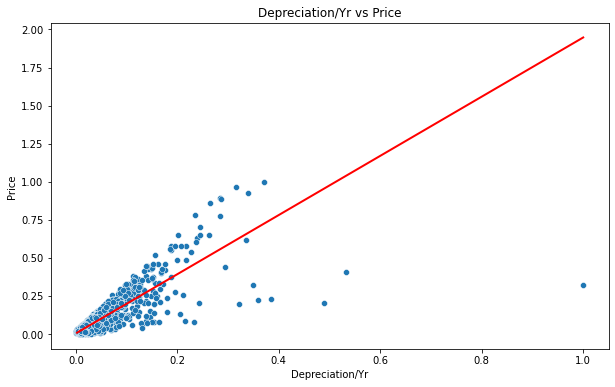

In [28]:
# Re-running the MSE test using the scaled values
# Selecting the relevant columns
features = df_scaled[['Depreciation/Yr']]
label = df_scaled['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualising the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depreciation/Yr', y='Price', data=df_scaled)

# Resetting indices to prevent errors when plotting
X_test_reset = X_test.reset_index(drop=True)
predictions_reset = pd.Series(predictions, name='Price').reset_index(drop=True)

# Sorting based on 'Depreciation/Yr'
sorted_indices = X_test_reset['Depreciation/Yr'].sort_values().index

# Plotting the regression line
plt.plot(X_test_reset.loc[sorted_indices, 'Depreciation/Yr'], predictions_reset[sorted_indices], color='red', linewidth=2)
plt.title('Depreciation/Yr vs Price')
plt.xlabel('Depreciation/Yr')
plt.ylabel('Price')
plt.show()

Now it seems like the MSE has reduced significantly to 0.003. This indicates that the model is performing better on the scaled data. This might mean that linear regression model performs better with scaled data if the numerical values are very large. Scaling the features and labels to the range 0-1 has contributed significantly the MSE making the model more accurate in predicting the price based on depreciation.

## Validation

The model's result could be validated by implimenting cross validation by the use of K-Fold. K-Fold splits the dataset into subsets and train the models k times, each time using a different subset as the test and the remaining as the training set. This calculate the MSE of each subset and averages the results. This would also provide a more reliable estimate to the model's performance.

In [29]:
# Importing the K-Fold package
from sklearn.model_selection import KFold

In [30]:
# Selecting the relevant columns
features = df_scaled[['Depreciation/Yr']]
label = df_scaled['Price']

# Setting the number of folds to 10
k = 10

# Initialising K-Fold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Creating a Linear Regression Model
model = LinearRegression()

# Creating an empty list to store the MSE of each fold
mse_scores = []

# Performing K-Fold Cross-Validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]

    # Fitting the model to the training data
    model.fit(X_train, y_train)

    # Making predictions on the test set
    predictions = model.predict(X_test)

    # Calculating the MSE for the fold
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculating the average MSE across all folds
average_mse = np.mean(mse_scores)

print(f'Average MSE across {k} folds: {average_mse}')

Average MSE across 10 folds: 0.0015996824410321475


The average MSE of 0.0015 indicates that the model's prediction are quite close to the actual value, which also means that there are smaller error between the predicted and actual values. The use of cross-validation would ensure that the model's performance is consistent throughout the different subsets of the data. By using the average MSE would also provide a more robust estimate of the model's performance as compared to a single test. Since the K-Fold was ran with the scaled data of 0-1 a result of 0.0015 is relatively small and indicates that the model performed well.

## Feature Engineering

There are 4 main techniques in topic 5.4. The techniques are:

1. Text Features:
This technique focuses on dealing with textual data and discusses the challenges faced when working with text data. However, since the objective of the project was to create a linear regression model using depreciation and price which are all int32. This technique will not be applied in this project.

2. Feature Selection
This technique focuses on the importance of choosing the right features for the model. The feature Depreciation/Yr was chosen as there might be a linear regression as seen in the graphs above. The concept of using polynomial features, however, could be implemented in this project.

3. Imputation of Missing Data
This technique focuses on dealing with missing values in data. Since in the real world, most of the raw data are not clean and often contain missing values. This technique was already applied in the data preparation section. After observing the dataset, it was found that missing data are in the form of '-' and 'N.A' and was removed by filtering out those values and pushing the rest into the new dataframe df_clean.

4. Feature Pipelines
This technique emphasises the need to string together various steps in model creation to analysis efficiently. The pipeline allows for multiple steps to run at the same time for example, transforming the feature space with polynomial features and fitting a linear regression model. The concept of feature pipeline could be implemented in this project by combining polynomial features and fitting a linear regression model.

In [31]:
# Importing the relevant packages from python
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Splitting the data into features and target
X = df_scaled[['Depreciation/Yr']]
y = df_scaled['Price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the column transformer with PolynomialFeatures
preprocessor = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False), ['Depreciation/Yr']),
        ('scaler', StandardScaler(), ['Depreciation/Yr'])
    ])

# Creating the pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
model_score = pipeline.score(X_test, y_test)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'Model Score (R-squared): {model_score}')

Root Mean Squared Error (RMSE): 0.03204137406097326
Model Score (R-squared): 0.7091480142490174


The feature pipeline technique was implemented and the Root Mean Squared Error (RMSE) is 0.032. By comparing with the MSE of 10 folds, it can be seen that the average MSE across 10 folds perform better in terms of prediction. However, RMSE can be used to provide a more interpretable measure as it is the average of errors in the predicted values. The average MSE might perform better but it does not give the sense of the scale of the error as it is calculated without the square root which might be more sensitive to extreme errors. However, by comparing the model score from the first linear regression model at 0.08 and the pipeline at 0.709, the feature pipeline technique managed to capture more portions of the underlying patterns in the data.

## Evaluation

The performance of the machine learning model was numerically accessed using Mean Squared Error (MSE), K-Fold, Root Mean Square Error (RMSE), and the score of the model. MSE provides a direct measure of the averaged squared difference between the predicted value and the values in the dataset, while RMSE emphaises the impact of larger errors. The score of the model calculates the proportion of variance in the targer variable.

The metrics were chosen as MSE and RMSE evaluated the model's prediction rate, highlighting the average and squared average errors. The K-Fold was also used to cross validate the MSE value. The model's score (R-square and normal) complements the metrics by offering an overall measure of the model's explanatory power.

Reflecting on the results, the models are performing better and better since the first linear regression model in this project. The first MSE was extremely high, however, by the use of scaling the value of the MSE dropped significantly. The use of the feature pipelines also managed to obtain a better model score which is a sign that the models are improving.

This project makes significant contributions to the automotive industry in Singapore by employing a linear regression model to predict used car prices. The precise prediction benefits both the buyer and the seller. The buyer would be able to make informed decisions before purchasing and the seller would be able to offer competitive prices.

While the focus of this project is on the automotive industry in Singapore, the methodology and framework could also be used in other domains. The approach to data collection, preparation, visualisation, implementing a linear regression model could also be used in other domains that faces prediction challenges. The adaptability allows for potention application in different sectors. The core principles in this project pave the way for transferability to other domain-specific areas, showcasing the scalability and relevance of the project's outcomes beyond the automotive industry in Singapore.